# Vehicle loan default predection

Importing necessary libs and custom functions

In [220]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from IPython.display import Image

#importing custom functions from functions.py file
from functions import dateconvert
from functions import yrscalc
from functions import time_diff_months
from functions import resample

ImportError: cannot import name 'resample' from 'functions' (D:\Files\DSC\Capstone 2\Loan default prediction\Notebooks\functions.py)

In [236]:
df = pd.read_csv(r'../Data/train.csv')

In [237]:
df = df.head(10000)
df.head(10)

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
5,518279,54513,61900,89.66,67,22807,45,1501,08-09-90,Self employed,...,0,0,1347,0,0,0,1yrs 9mon,2yrs 0mon,0,0
6,529269,46349,61500,76.42,67,22807,45,1502,01-06-88,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
7,510278,43894,61900,71.89,67,22807,45,1501,04-10-89,Salaried,...,0,0,0,0,0,0,0yrs 2mon,0yrs 2mon,0,0
8,490213,53713,61973,89.56,67,22807,45,1497,15-11-91,Self employed,...,0,0,0,0,0,0,4yrs 8mon,4yrs 8mon,1,0
9,510980,52603,61300,86.95,67,22807,45,1492,01-06-68,Salaried,...,0,0,2608,0,0,0,1yrs 7mon,1yrs 7mon,0,0


In [238]:
#cleaning
df['Date.of.Birth'] = df['Date.of.Birth'].apply(dateconvert,delim='-')
df['DisbursalDate'] = df['DisbursalDate'].apply(dateconvert,delim='-')
df['Employment.Type'].fillna('Unknown',inplace=True)
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01 00:00:00+00:00,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,1985-07-31 00:00:00+00:00,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24 00:00:00+00:00,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,1993-12-30 00:00:00+00:00,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,1977-12-09 00:00:00+00:00,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [239]:
#Code for label
df['labels'] = df['loan_default'].apply(lambda x:'Paid' if x==0 else "default")

In [240]:
#imbalanced data
fig = px.pie(df, names='labels')
fig.show()

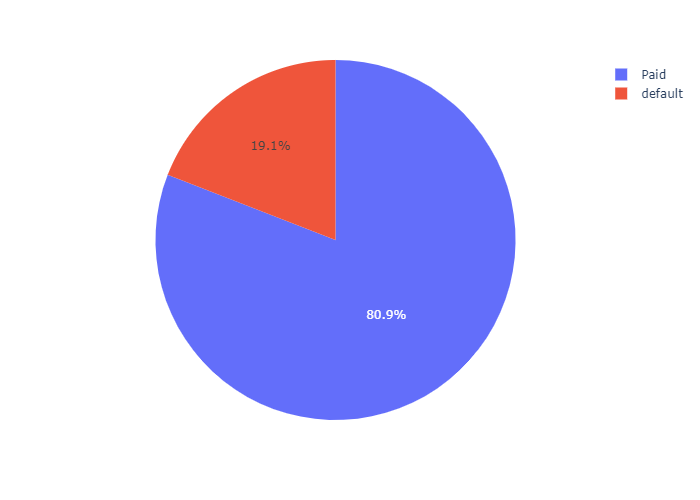

In [201]:
#Plot to be for non dynamic notebook render
fig.write_image(r"fig1.png")
img_bytes = fig.to_image(format="png")
Image(img_bytes)

In [241]:
#Feature engineering
emp_type = {'Unknown':0,'Self employed':1,'Salaried':2}

cns_desc = {'No Bureau History Available':0,
            'Not Scored: Sufficient History Not Available':0,
            'Not Scored: Not Enough Info available on the customer':0,
           'Not Scored: No Activity seen on the customer (Inactive)':0,
           'Not Scored: No Updates available in last 36 months':0,
           'Not Scored: Only a Guarantor':1,
           'Not Scored: More than 50 active Accounts found':1,
           'M-Very High Risk':2,
           'L-Very High Risk':3,
           'K-High Risk':4,
            'J-High Risk':5,
            'H-Medium Risk':6,
            'I-Medium Risk':7,
            'F-Low Risk':8,
            'E-Low Risk':9,
            'G-Low Risk':10,
            'C-Very Low Risk':11,
            'A-Very Low Risk':12,
            'D-Very Low Risk':13,
            'B-Very Low Risk':14
           }
df['Age'] = df['Date.of.Birth'].apply(time_diff_months)
df['AVERAGE.ACCT.AGE'] = df['AVERAGE.ACCT.AGE'].apply(yrscalc)
df['CREDIT.HISTORY.LENGTH'] = df['CREDIT.HISTORY.LENGTH'].apply(yrscalc)
df['Age.of.Loan'] = df['DisbursalDate'].apply(time_diff_months)
#combaining to sum of ids
df['No.of.Proofs'] = df[['Aadhar_flag','VoterID_flag','PAN_flag','Driving_flag','Passport_flag','MobileNo_Avl_Flag']].sum(axis=1)

In [242]:
df['PERFORM_CNS.SCORE.DESCRIPTION'] = df['PERFORM_CNS.SCORE.DESCRIPTION'].map(cns_desc)
df['Employment.Type'] = df['Employment.Type'].map(emp_type)


In [243]:
#df['No.of.ids'] = sum(df[['Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag','Passport_flag']])
X = df.drop(columns=['UniqueID','loan_default','labels','Date.of.Birth','DisbursalDate','Aadhar_flag','PAN_flag','VoterID_flag','Driving_flag','Passport_flag','MobileNo_Avl_Flag'])
y = df[['loan_default']]

In [244]:
#dealing with imbalanced data
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority',random_state=27)
os_X,os_y = smote.fit_sample(X,y)

In [245]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(oob_score=True,random_state=27,bootstrap=True,n_estimators=15)
model.fit(os_X,os_y)

C:\Users\kavin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\kavin\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

C:\Users\kavin\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning:

invalid value encountered in true_divide



ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=None,
                     oob_score=True, random_state=27, verbose=0,
                     warm_start=False)

In [246]:
k = list(X.columns)
pd_feature = pd.DataFrame(data=[k,model.feature_importances_])
pd_feature = pd_feature.T
pd_feature.columns=['features','scores']

In [247]:
pd_feature.sort_values(['scores'],ascending=False)

,features,scores
2,ltv,0.0731059
32,Age.of.Loan,0.0727213
0,disbursed_amount,0.0713908
6,Current_pincode_ID,0.0669565
31,Age,0.0636816
3,branch_id,0.0613326
9,Employee_code_ID,0.0605144
1,asset_cost,0.0597458
4,supplier_id,0.0535864
5,manufacturer_id,0.0528931


In [248]:
model.oob_score_

0.8068153345026309

In [249]:
plt.figure(figsize=(25,25))
fig = px.bar(pd_feature,x='features',y='scores',text='scores', width=900, height=700)
fig.show()

<Figure size 1800x1800 with 0 Axes>

In [ ]:
#non dynamic render.For purpose of being displayed in Github
Image(filename=r'../Images/feature_score.png')

In [250]:
from sklearn.model_selection import cross_val_score,RepeatedStratifiedKFold
from imblearn.ensemble import BalancedRandomForestClassifier
brc_model = BalancedRandomForestClassifier(n_estimators=10)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=27)
scores = cross_val_score(brc_model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print(f'Mean AUC_ROC score : {scores.mean()}')

Mean AUC_ROC score : 0.608131751360935


In [251]:
from sklearn.model_selection import cross_val_score,RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=27)
scores = cross_val_score(rf_model, os_X, os_y, scoring='roc_auc', cv=cv, n_jobs=-1)
print(f'Mean AUC_ROC score : {scores.mean()}')

Mean AUC_ROC score : 0.9063433923172092


In [252]:
from sklearn.model_selection import cross_val_score,RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=27)
scores = cross_val_score(rf_model, os_X, os_y, scoring='accuracy', cv=cv, n_jobs=-1)
print(f'Accuracy : {scores.mean()}')

Accuracy : 0.8436687628066196


In [ ]:
from sklearn.metrics import classification_report
c_report = classification_report(test_targets,y_pred_logmodel,target_names=['Negative','Positive'])